# LOGISTIC REGRESSION ON TIATNIC DATA SET 

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv(r"D:\STUDY\MACHINE_LEARNING\5 logsitic regression\Titanic-Dataset.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df=df.drop(["PassengerId","Name", "Ticket","Cabin"], axis=1)

In [8]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [9]:
df["Sex"]= df["Sex"].map ({"male": 0 , "female":1})

In [10]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,S
887,1,1,1,19.0,0,0,30.0000,S
888,0,3,1,NaN,1,2,23.4500,S
889,1,1,0,26.0,0,0,30.0000,C


In [11]:
df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [12]:
df["Embarked"] = df["Embarked"].map({'S': 0, 'C': 1, 'Q': 2})


In [13]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0.0
1,1,1,1,38.0,1,0,71.2833,1.0
2,1,3,1,26.0,0,0,7.9250,0.0
3,1,1,1,35.0,1,0,53.1000,0.0
4,0,3,0,35.0,0,0,8.0500,0.0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0.0
887,1,1,1,19.0,0,0,30.0000,0.0
888,0,3,1,NaN,1,2,23.4500,0.0
889,1,1,0,26.0,0,0,30.0000,1.0


In [15]:
print(df.dtypes)

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked    float64
dtype: object


In [16]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [19]:
corr=df.corr()
corr

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307,0.108669
Pclass,-0.338481,1.000000,-0.131900,-0.369226,0.083081,0.018443,-0.549500,0.043835
Sex,0.543351,-0.131900,1.000000,-0.093254,0.114631,0.245489,0.182333,0.118593
Age,-0.077221,-0.369226,-0.093254,1.000000,-0.308247,-0.189119,0.096067,0.012186
SibSp,-0.035322,0.083081,0.114631,-0.308247,1.000000,0.414838,0.159651,-0.060606
Parch,0.081629,0.018443,0.245489,-0.189119,0.414838,1.000000,0.216225,-0.079320
Fare,0.257307,-0.549500,0.182333,0.096067,0.159651,0.216225,1.000000,0.063462
Embarked,0.108669,0.043835,0.118593,0.012186,-0.060606,-0.079320,0.063462,1.000000


<Axes: >

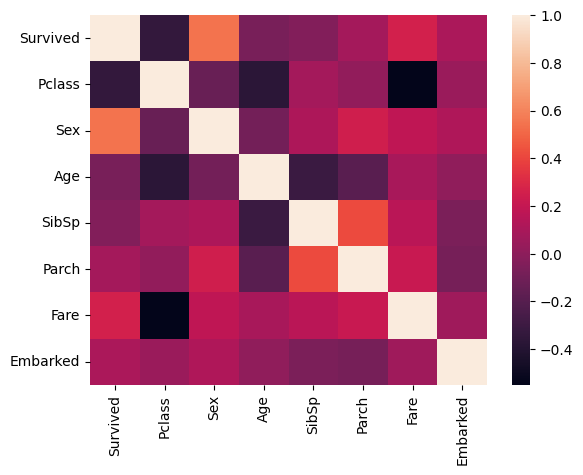

In [20]:
sns.heatmap(corr)

In [21]:
df=df.dropna()

In [22]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [23]:
df.shape

(712, 8)

In [25]:
df['Survived'].value_counts()

Survived
0    424
1    288
Name: count, dtype: int64

In [27]:
x=df.drop('Survived', axis=1)
y=df["Survived"]

In [28]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0.0
1,1,1,38.0,1,0,71.2833,1.0
2,3,1,26.0,0,0,7.9250,0.0
3,1,1,35.0,1,0,53.1000,0.0
4,3,0,35.0,0,0,8.0500,0.0
...,...,...,...,...,...,...,...
885,3,1,39.0,0,5,29.1250,2.0
886,2,0,27.0,0,0,13.0000,0.0
887,1,1,19.0,0,0,30.0000,0.0
889,1,0,26.0,0,0,30.0000,1.0


In [29]:
y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 712, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,train_size=0.2,random_state=42)


In [31]:
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
804,3,0,27.00,0,0,6.9750,0.0
761,3,0,41.00,0,0,7.1250,0.0
702,3,1,18.00,0,1,14.4542,1.0
111,3,1,14.50,1,0,14.4542,1.0
305,1,0,0.92,1,2,151.5500,0.0
...,...,...,...,...,...,...,...
93,3,0,26.00,1,2,20.5750,0.0
135,2,0,23.00,0,0,15.0458,1.0
338,3,0,45.00,0,0,8.0500,0.0
549,2,0,8.00,1,1,36.7500,0.0


In [33]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [34]:
x_test_scaled

array([[-1.39990042,  1.51734162, -0.44208316, ..., -0.44544877,
         0.87621458,  1.82234362],
       [-1.39990042,  1.51734162,  1.7234213 , ..., -0.44544877,
         1.08944875,  1.82234362],
       [-1.39990042, -0.65904737,  1.57905433, ...,  0.92963221,
         1.12234456, -0.46768111],
       ...,
       [ 0.9250804 , -0.65904737, -0.73081709, ..., -0.44544877,
        -0.58500799, -0.46768111],
       [ 0.9250804 , -0.65904737, -0.36989968, ..., -0.44544877,
        -0.60413241, -0.46768111],
       [-1.39990042, -0.65904737,  0.56848559, ..., -0.44544877,
        -0.77178617, -0.46768111]], shape=(570, 7))

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
model=LogisticRegression()
model.fit(x_train_scaled, y_train)
y_pred= model.predict(x_test_scaled)
score=accuracy_score(y_test, y_pred)
print("accuracy score is " ,score)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))


accuracy score is  0.8035087719298246
[[277  64]
 [ 48 181]]
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       341
           1       0.74      0.79      0.76       229

    accuracy                           0.80       570
   macro avg       0.80      0.80      0.80       570
weighted avg       0.81      0.80      0.80       570



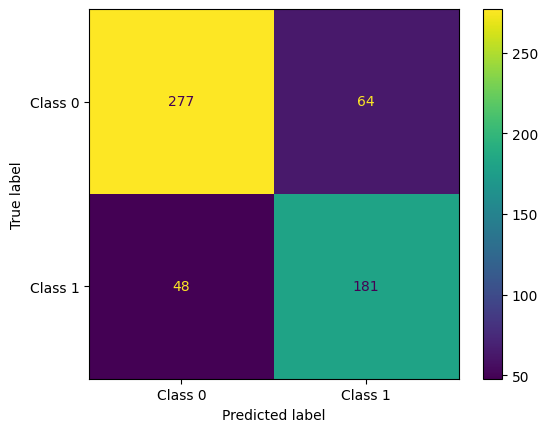

In [37]:
from sklearn.metrics import  ConfusionMatrixDisplay
ConfusionMatrixDisplay(cm, display_labels=["Class 0", "Class 1"]).plot()
